# BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

In [2]:
# First I have import all the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [3]:
# I have imported the given dataset
train_df = pd.read_csv('TrainBanking.csv')
train_df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


# Checking some information :

In [4]:
# Checking the information of the data :
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [5]:
# Checking is  there any null  value is there
train_df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [6]:
# Checking is there any duplicate row present :
train_df.duplicated().sum()

0

# Data Visualization for some information :

In [7]:
# First I have modified the subscribed column :
train_df['subscribed'] = train_df['subscribed'].map({'yes':1 , 'no':0})

# Checking what is the relation of deposit subscribing with other factors :

<Axes: xlabel='subscribed', ylabel='age'>

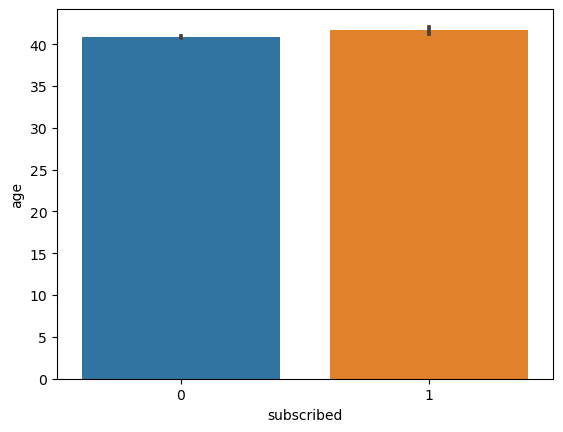

In [8]:
sns.barplot(data =  train_df , x = 'subscribed' , y = 'age')

In [9]:
# 1. So , 'Age' is not a dependant factor here .

<Axes: xlabel='subscribed', ylabel='balance'>

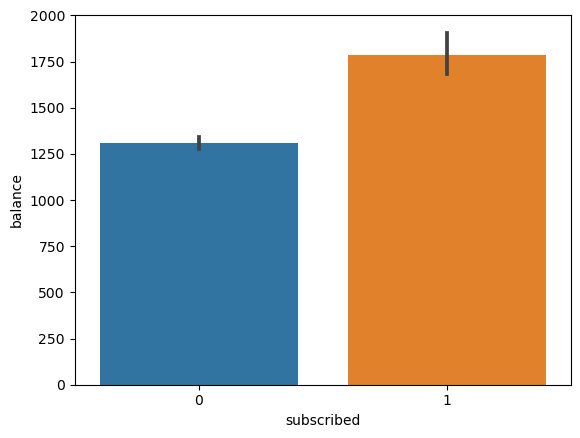

In [10]:
sns.barplot(data =  train_df , x = 'subscribed' , y = 'balance')

In [11]:
# So ,people who subscribed the deposite , there bank  balance is high .

<Axes: xlabel='subscribed', ylabel='duration'>

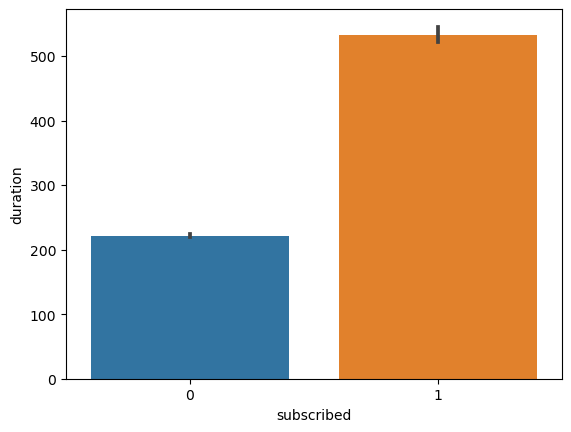

In [12]:
sns.barplot(data =  train_df , x = 'subscribed' , y = 'duration')

In [13]:
# So , people with more contact duration has subscribed the deposite. 

<Axes: xlabel='subscribed', ylabel='campaign'>

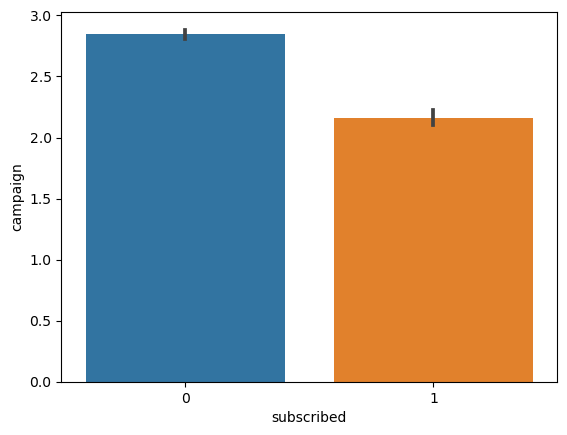

In [14]:
sns.barplot(data =  train_df , x = 'subscribed' , y = 'campaign')

In [15]:
# So ,people with low campaign has subscribed the deposite 

<Axes: xlabel='subscribed', ylabel='pdays'>

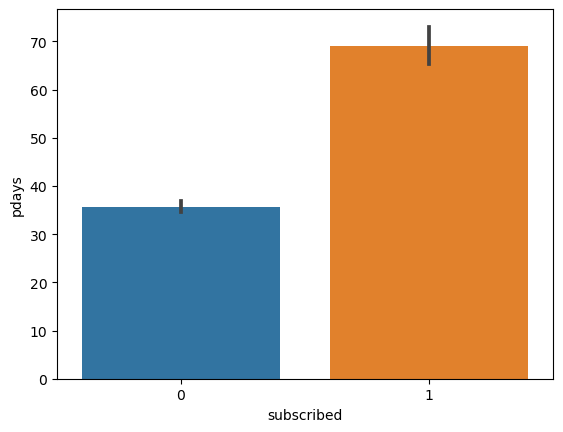

In [16]:
sns.barplot(data =  train_df , x = 'subscribed' , y = 'pdays')

In [17]:
# people with more number of days that passed by after the they last contacted has subscribed the deposite :

<Axes: xlabel='subscribed', ylabel='previous'>

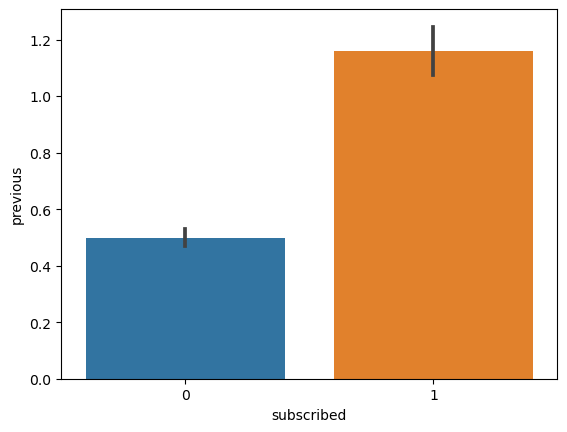

In [18]:
sns.barplot(data =  train_df , x = 'subscribed' , y = 'previous')

In [19]:
# People with more number of contacts performed before this campaign has subscribed the loan

# Checking the relation of jobs with other sectors :

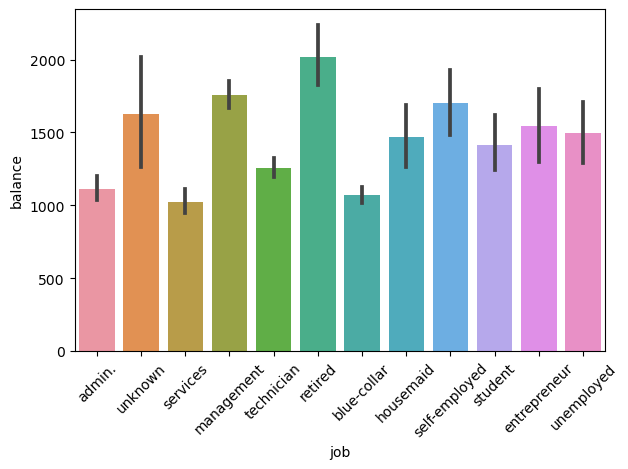

In [20]:
sns.barplot(data =  train_df , x = 'job' , y = 'balance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

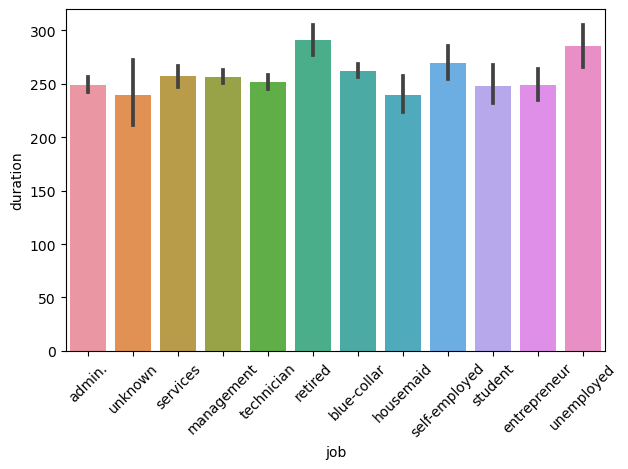

In [21]:
sns.barplot(data =  train_df , x = 'job' , y = 'duration')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

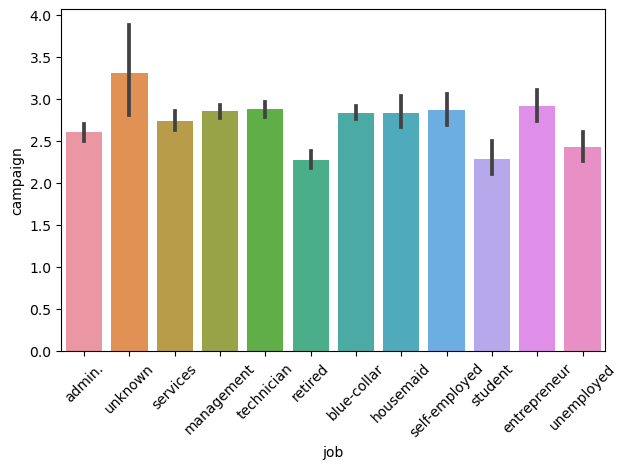

In [22]:
sns.barplot(data =  train_df , x = 'job' , y = 'campaign')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

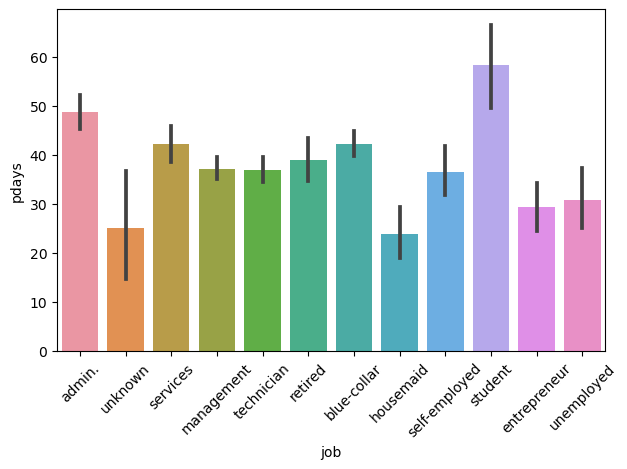

In [23]:
sns.barplot(data =  train_df , x = 'job' , y = 'pdays')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

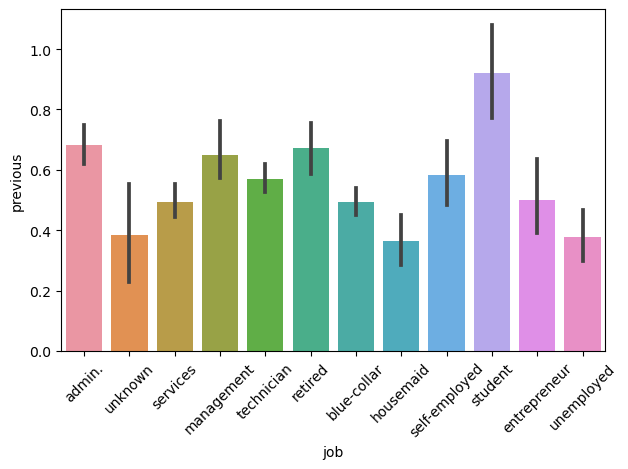

In [24]:
sns.barplot(data =  train_df , x = 'job' , y = 'previous')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Working with individual columns :

# Working with job column :

In [25]:
train_df.groupby('job').mean()['subscribed']*100

job
admin.           12.448361
blue-collar       7.147033
entrepreneur      8.432540
housemaid         9.038902
management       13.902696
retired          22.998729
self-employed    12.466607
services          8.749569
student          28.661417
technician       11.192764
unemployed       14.254144
unknown          12.621359
Name: subscribed, dtype: float64

<Axes: xlabel='job'>

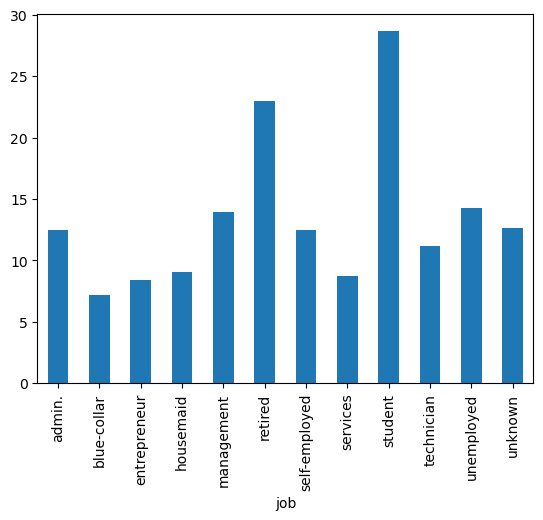

In [26]:
(train_df.groupby('job').mean()['subscribed']*100).plot(kind = 'bar')

In [27]:
# So , Here I can see that the % of  studets subscribing the fixed deposite is comparetively more than others

In [28]:
pd.crosstab(train_df['job'], train_df['subscribed'])

subscribed,0,1
job,,
admin.,3179,452
blue-collar,6353,489
entrepreneur,923,85
housemaid,795,79
management,5716,923
retired,1212,362
self-employed,983,140
services,2649,254
student,453,182


# Working with marital column  :

In [29]:
train_df.groupby('marital').mean()['subscribed']*100

marital
divorced    12.258953
married     10.049751
single      15.142345
Name: subscribed, dtype: float64

<Axes: xlabel='marital'>

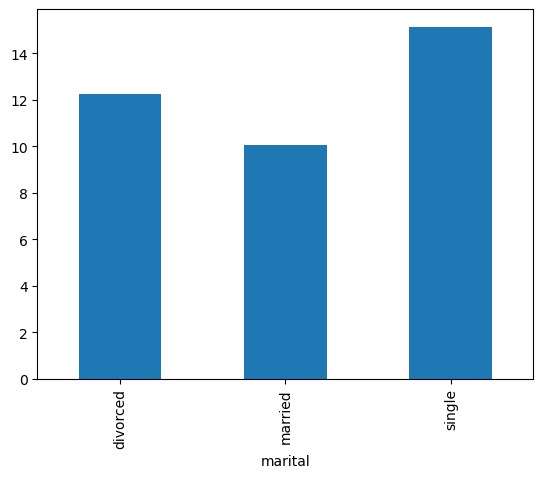

In [30]:
(train_df.groupby('marital').mean()['subscribed']*100).plot(kind = 'bar')

In [31]:
pd.crosstab(train_df['marital'], train_df['subscribed'])

subscribed,0,1
marital,,
divorced,3185,445
married,17176,1919
single,7571,1351


In [32]:
# People who are married , they are not subscribing the fixed deposit as much as the other marital features

# Working with education column :

In [33]:
train_df.groupby('education').mean()['subscribed']*100

education
primary       8.881032
secondary    10.459813
tertiary     15.213418
unknown      13.394216
Name: subscribed, dtype: float64

<Axes: xlabel='education'>

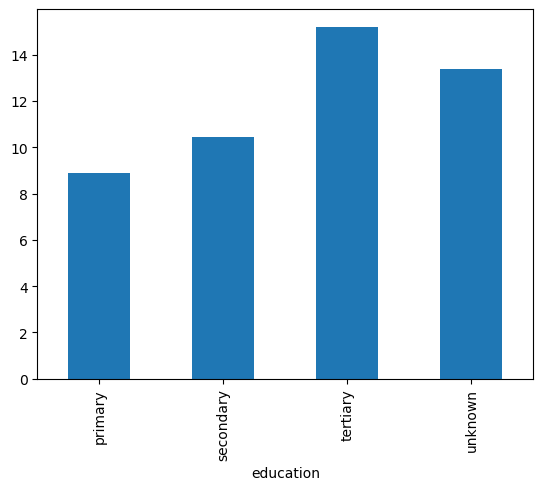

In [34]:
(train_df.groupby('education').mean()['subscribed']*100).plot(kind = 'bar')

In [35]:
pd.crosstab(train_df['education'] , train_df['subscribed'])

subscribed,0,1
education,,
primary,4381,427
secondary,14527,1697
tertiary,7886,1415
unknown,1138,176


# Working with default column :

In [36]:
train_df.groupby('default').mean()['subscribed']*100

default
no     11.827957
yes     7.008547
Name: subscribed, dtype: float64

<Axes: xlabel='default'>

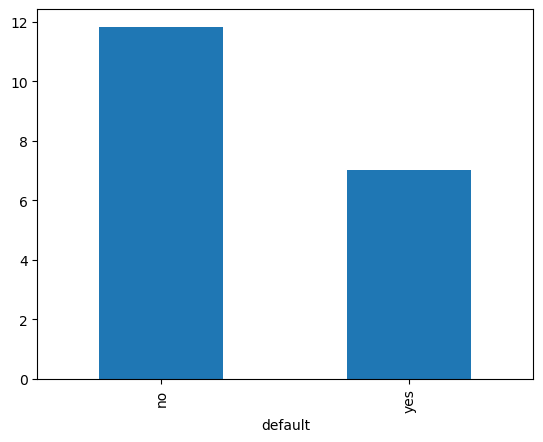

In [37]:
(train_df.groupby('default').mean()['subscribed']*100).plot(kind = 'bar')

In [38]:
pd.crosstab(train_df['default'], train_df['subscribed'])

subscribed,0,1
default,,
no,27388,3674
yes,544,41


# Working with housing column 

In [39]:
train_df.groupby('housing').mean()['subscribed']*100

housing
no     16.817180
yes     7.677434
Name: subscribed, dtype: float64

<Axes: xlabel='housing'>

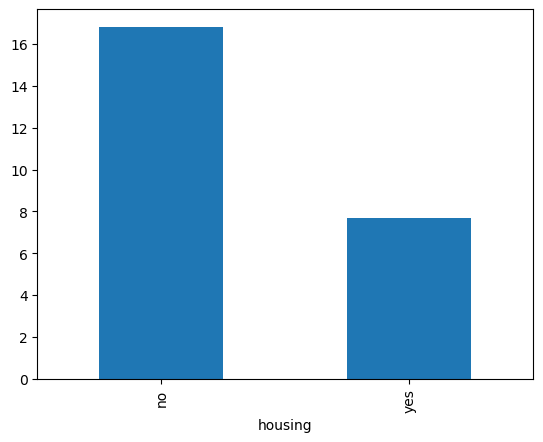

In [40]:
(train_df.groupby('housing').mean()['subscribed']*100).plot(kind = 'bar')

In [41]:
pd.crosstab(train_df['housing'] , train_df['subscribed'])

subscribed,0,1
housing,,
no,11698,2365
yes,16234,1350


# Working with loan column :

In [42]:
train_df.groupby('loan').mean()['subscribed']*100

loan
no     12.762106
yes     6.450984
Name: subscribed, dtype: float64

<Axes: xlabel='loan'>

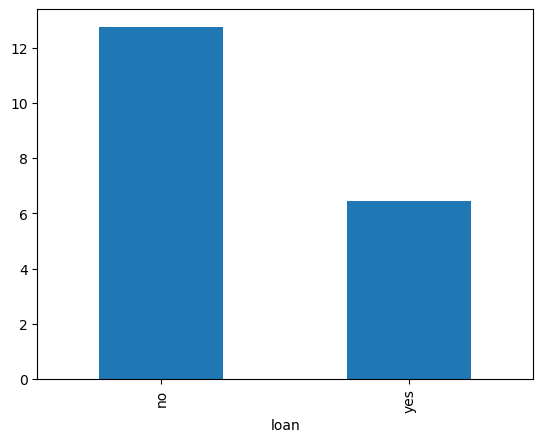

In [43]:
(train_df.groupby('loan').mean()['subscribed']*100).plot(kind = 'bar')

In [44]:
pd.crosstab(train_df['loan'], train_df['subscribed'])

subscribed,0,1
loan,,
no,23132,3384
yes,4800,331


# Working with contact column :

In [45]:
train_df.groupby('contact').mean()['subscribed']*100

contact
cellular     15.036968
telephone    13.092330
unknown       4.097200
Name: subscribed, dtype: float64

<Axes: xlabel='contact'>

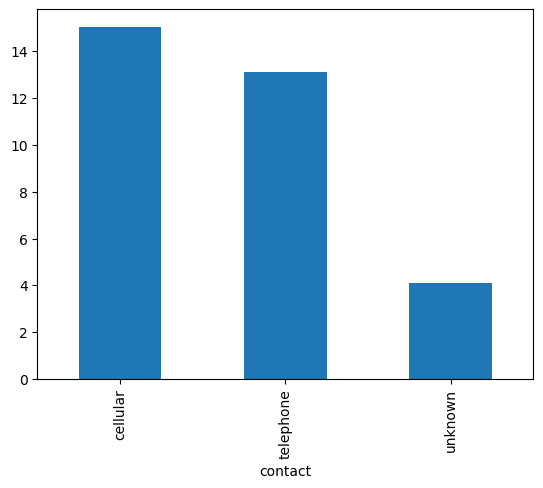

In [46]:
(train_df.groupby('contact').mean()['subscribed']*100).plot(kind = 'bar')

In [47]:
pd.crosstab(train_df['contact'] , train_df['subscribed'])

subscribed,0,1
contact,,
cellular,17352,3071
telephone,1779,268
unknown,8801,376


# Working with month column :

In [48]:
train_df.groupby('month').mean()['subscribed']*100

month
apr    18.686131
aug    12.000923
dec    45.859873
feb    16.694034
jan     9.928352
jul     9.104046
jun    10.246121
mar    50.877193
may     6.712173
nov     9.881423
oct    43.750000
sep    46.585366
Name: subscribed, dtype: float64

<Axes: xlabel='month'>

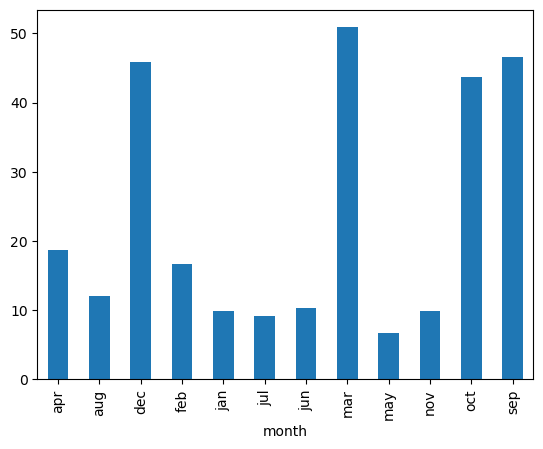

In [49]:
(train_df.groupby('month').mean()['subscribed']*100).plot(kind = 'bar')

In [50]:
pd.crosstab(train_df['month'],train_df['subscribed'])

subscribed,0,1
month,,
apr,1671,384
aug,3813,520
dec,85,72
feb,1522,305
jan,880,97
jul,4403,441
jun,3355,383
mar,168,174
may,9020,649


# Working with poutcome column :

In [51]:
train_df.groupby('poutcome').mean()['subscribed']*100

poutcome
failure    12.819750
other      16.847826
success    64.981273
unknown     9.151915
Name: subscribed, dtype: float64

<Axes: xlabel='poutcome'>

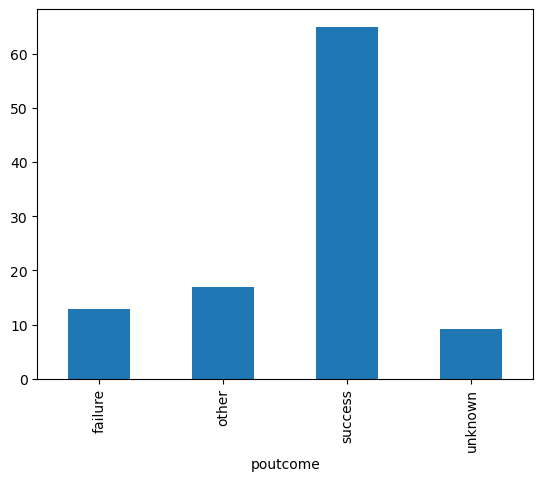

In [52]:
(train_df.groupby('poutcome').mean()['subscribed']*100).plot(kind = 'bar')

In [53]:
pd.crosstab(train_df['poutcome'], train_df['subscribed'])

subscribed,0,1
poutcome,,
failure,2931,431
other,1071,217
success,374,694
unknown,23556,2373


# I wnat to check why people are subscribing or not subscribing the fixed deposite  :

In [54]:
subscribed_no = train_df[train_df['subscribed'] == 0]
subscribed_no

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0
5,29390,33,management,single,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,12109,43,management,single,secondary,no,2968,no,no,unknown,20,jun,30,4,-1,0,unknown,0
31641,9476,37,technician,single,tertiary,no,1309,no,no,unknown,6,jun,442,2,-1,0,unknown,0
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,0
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,0


In [55]:
subscribed_yes = train_df[train_df['subscribed'] == 1]
subscribed_yes

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1
6,40444,56,retired,married,secondary,no,1044,no,no,telephone,3,jul,353,2,-1,0,unknown,1
10,14699,36,services,divorced,secondary,yes,0,no,yes,cellular,15,jul,687,7,-1,0,unknown,1
18,35310,44,blue-collar,married,primary,no,4031,yes,no,cellular,7,may,983,4,-1,0,unknown,1
23,14731,39,management,married,tertiary,no,285,yes,no,cellular,15,jul,838,3,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31611,33754,65,management,divorced,tertiary,no,90,yes,no,cellular,22,apr,416,1,-1,0,unknown,1
31622,44152,79,retired,divorced,primary,no,2787,no,no,telephone,13,jul,617,1,377,1,success,1
31632,5195,33,blue-collar,married,secondary,no,0,yes,no,unknown,21,may,521,3,-1,0,unknown,1
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,1


In [56]:
def Checking(df):   
    marital_counts = df['marital'].value_counts()
    education = df['education'].value_counts()
    default = df['default'].value_counts()
    housing = df['housing'].value_counts()
    loan = df['loan'].value_counts()
    contact = df['contact'].value_counts()
    month = df['month'].value_counts()
    poutcome = df['poutcome'].value_counts()
    
    print('Tnformations are :')
    print()
    print('The marital  status is :')
    print(marital_counts)
    print()
    print('The education qualification are :')
    print(education)
    print()
    print('The default value are :')
    print(default)
    print()
    print('The number of housing loan takers are :')
    print(housing)
    print()
    print('The number of loan takers are :')
    print(loan)
    print()
    print('The contact medium : ')
    print(contact)
    print()
    print('The number of contacts in each months :')
    print(month)
    print()
    print('The number of each outcome of the previous marketing compain :')
    print(poutcome)

# I want to see what is wrong with blue collor job's people :

In [57]:
blue_collar_no = subscribed_no[subscribed_no['job']== 'blue-collar']

In [58]:
blue_collar_no

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
8,29824,45,blue-collar,divorced,secondary,no,1951,yes,no,cellular,4,feb,692,1,-1,0,unknown,0
11,30180,35,blue-collar,married,secondary,no,-151,yes,no,cellular,5,feb,96,2,-1,0,unknown,0
14,3260,43,blue-collar,married,secondary,no,960,yes,no,unknown,15,may,436,1,-1,0,unknown,0
19,38291,48,blue-collar,divorced,secondary,no,501,yes,no,cellular,15,may,12,5,-1,0,unknown,0
32,1352,46,blue-collar,married,primary,no,-768,yes,no,unknown,8,may,194,3,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31602,38853,26,blue-collar,single,secondary,no,384,yes,no,cellular,18,may,16,1,364,2,other,0
31608,2384,26,blue-collar,single,secondary,no,309,yes,no,unknown,13,may,210,1,-1,0,unknown,0
31614,29345,40,blue-collar,married,secondary,yes,231,yes,no,cellular,2,feb,69,3,-1,0,unknown,0
31618,8778,21,blue-collar,single,secondary,yes,-59,yes,yes,unknown,4,jun,83,1,-1,0,unknown,0


In [59]:
blue_collar_no.describe()

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
count,6353.000000,6353.000000,6353.000000,6353.000000,6353.000000,6353.000000,6353.000000,6353.000000,6353.0
mean,18916.192350,40.141665,1052.112703,15.597513,230.653864,2.881316,41.608846,0.465292,0.0
std,13129.327072,9.031348,2313.597558,7.897065,212.569109,3.344102,107.527051,1.740420,0.0
min,4.000000,20.000000,-8019.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.0
25%,6842.000000,33.000000,47.000000,9.000000,101.000000,1.000000,-1.000000,0.000000,0.0
50%,16279.000000,39.000000,367.000000,15.000000,176.000000,2.000000,-1.000000,0.000000,0.0
75%,32373.000000,47.000000,1138.000000,20.000000,292.000000,3.000000,-1.000000,0.000000,0.0
max,45210.000000,75.000000,66653.000000,31.000000,3422.000000,50.000000,838.000000,41.000000,0.0


In [60]:
Checking(blue_collar_no)

Tnformations are :

The marital  status is :
married     4606
single      1270
divorced     477
Name: marital, dtype: int64

The education qualification are :
secondary    3453
primary      2512
unknown       302
tertiary       86
Name: education, dtype: int64

The default value are :
no     6227
yes     126
Name: default, dtype: int64

The number of housing loan takers are :
yes    4663
no     1690
Name: housing, dtype: int64

The number of loan takers are :
no     5229
yes    1124
Name: loan, dtype: int64

The contact medium : 
cellular     3241
unknown      2696
telephone     416
Name: contact, dtype: int64

The number of contacts in each months :
may    2964
jul     909
jun     814
apr     475
nov     384
aug     383
feb     248
jan     116
oct      28
sep      14
mar      11
dec       7
Name: month, dtype: int64

The number of each outcome of the previous marketing compain :
unknown    5383
failure     678
other       250
success      42
Name: poutcome, dtype: int64


In [61]:
# My observation on people of blue-collar job not subscribing the fixed deposite  :
#     1. Most of them have the education level  of primary and secondary
#     2. Most of them are marrid
#     3. Most of them has housing loan
#     4. Most of them are contacted in the month of May ,  jun , july
#     5. There balance , duration , pdays and previous is low .
#     6. Most of the outcome of previous marketing campaign is unknown and failure

# I want to see why blue collar job's people are subscribeing the deposit :

In [62]:
blue_collar_yes = subscribed_yes[subscribed_yes['job']== 'blue-collar']
blue_collar_yes

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
18,35310,44,blue-collar,married,primary,no,4031,yes,no,cellular,7,may,983,4,-1,0,unknown,1
54,39213,33,blue-collar,married,secondary,no,139,yes,yes,cellular,18,may,732,2,291,5,failure,1
138,28285,32,blue-collar,married,primary,no,634,no,no,cellular,29,jan,696,1,-1,0,unknown,1
152,42323,24,blue-collar,married,secondary,no,272,no,no,cellular,16,nov,105,2,94,2,success,1
244,37018,50,blue-collar,married,primary,no,-522,yes,no,cellular,13,may,863,3,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31135,24275,57,blue-collar,married,secondary,no,1540,yes,no,cellular,17,nov,564,1,-1,0,unknown,1
31171,13165,28,blue-collar,single,secondary,no,517,no,yes,cellular,8,jul,681,1,-1,0,unknown,1
31199,37512,40,blue-collar,married,primary,no,830,yes,no,cellular,13,may,873,3,370,2,failure,1
31524,39365,42,blue-collar,married,secondary,no,366,yes,no,cellular,22,may,324,1,106,1,failure,1


In [63]:
Checking(blue_collar_yes)

Tnformations are :

The marital  status is :
married     295
single      152
divorced     42
Name: marital, dtype: int64

The education qualification are :
secondary    297
primary      152
unknown       23
tertiary      17
Name: education, dtype: int64

The default value are :
no     478
yes     11
Name: default, dtype: int64

The number of housing loan takers are :
yes    299
no     190
Name: housing, dtype: int64

The number of loan takers are :
no     413
yes     76
Name: loan, dtype: int64

The contact medium : 
cellular     358
unknown      105
telephone     26
Name: contact, dtype: int64

The number of contacts in each months :
may    155
jul     79
jun     60
apr     49
aug     43
nov     35
feb     25
sep     13
oct     12
jan      9
mar      5
dec      4
Name: month, dtype: int64

The number of each outcome of the previous marketing compain :
unknown    364
success     63
failure     39
other       23
Name: poutcome, dtype: int64


In [64]:
# I think the oly difference here is the number of success in previous MARKETING campaign is high more than number of failure

# I want to see what iks wrong with Management job people :

In [65]:
management_no = subscribed_no[subscribed_no['job']== 'management']
management_no

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
5,29390,33,management,single,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,unknown,0
13,480,39,management,single,secondary,no,1877,yes,no,unknown,6,may,185,1,-1,0,unknown,0
17,30489,64,management,married,tertiary,no,6251,no,no,telephone,5,feb,125,7,-1,0,unknown,0
20,4554,60,management,married,tertiary,no,328,yes,no,unknown,20,may,72,5,-1,0,unknown,0
25,20722,31,management,married,tertiary,no,4720,yes,no,cellular,13,aug,460,2,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31630,17513,36,management,single,tertiary,no,8,no,no,cellular,29,jul,858,7,-1,0,unknown,0
31635,41379,35,management,married,tertiary,no,4,no,no,cellular,1,sep,157,2,-1,0,unknown,0
31640,12109,43,management,single,secondary,no,2968,no,no,unknown,20,jun,30,4,-1,0,unknown,0
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,0


In [66]:
Checking(management_no)

Tnformations are :

The marital  status is :
married     3298
single      1715
divorced     703
Name: marital, dtype: int64

The education qualification are :
tertiary     4664
secondary     728
primary       191
unknown       133
Name: education, dtype: int64

The default value are :
no     5606
yes     110
Name: default, dtype: int64

The number of housing loan takers are :
yes    2966
no     2750
Name: housing, dtype: int64

The number of loan takers are :
no     4868
yes     848
Name: loan, dtype: int64

The contact medium : 
cellular     4116
unknown      1319
telephone     281
Name: contact, dtype: int64

The number of contacts in each months :
may    1393
aug    1199
jul     883
nov     708
jun     559
feb     308
apr     292
jan     185
oct      68
sep      58
mar      47
dec      16
Name: month, dtype: int64

The number of each outcome of the previous marketing compain :
unknown    4838
failure     578
other       211
success      89
Name: poutcome, dtype: int64


In [67]:
# My observation of why people of management job are not subscribing the fixed deposit :
#     1. Marital status is married
#     2. Most of them were contacted in the month of May , august , july
#     3. Number of people with and without housing loan is almost simillar
#     4. There balance , duration , pdays and previous is low 
#     5. Avg. Balance is little low
#     6. Avg. Campaign is little high
#     7. Avg. Pdays is low
#     8. Avg. previous is low

# I want to see for which reasons management job people are subscribing the fixed deposit :

In [68]:
management_yes = subscribed_yes[subscribed_yes['job']== 'management']
management_yes

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1
23,14731,39,management,married,tertiary,no,285,yes,no,cellular,15,jul,838,3,-1,0,unknown,1
44,42243,32,management,married,tertiary,no,1331,no,no,cellular,12,nov,126,1,92,5,failure,1
77,43246,33,management,single,tertiary,no,224,no,no,cellular,8,mar,241,2,-1,0,unknown,1
125,42960,27,management,single,tertiary,no,390,no,no,cellular,9,feb,120,2,104,2,failure,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31583,42222,53,management,married,tertiary,no,1624,no,no,cellular,11,nov,166,3,97,7,success,1
31606,9442,38,management,single,tertiary,no,619,yes,no,unknown,6,jun,460,4,-1,0,unknown,1
31611,33754,65,management,divorced,tertiary,no,90,yes,no,cellular,22,apr,416,1,-1,0,unknown,1
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,1


In [69]:
Checking(management_yes)

Tnformations are :

The marital  status is :
married     467
single      351
divorced    105
Name: marital, dtype: int64

The education qualification are :
tertiary     800
secondary     71
unknown       32
primary       20
Name: education, dtype: int64

The default value are :
no     916
yes      7
Name: default, dtype: int64

The number of housing loan takers are :
no     626
yes    297
Name: housing, dtype: int64

The number of loan takers are :
no     860
yes     63
Name: loan, dtype: int64

The contact medium : 
cellular     814
unknown       70
telephone     39
Name: contact, dtype: int64

The number of contacts in each months :
aug    162
may    116
jun    103
apr     98
jul     90
nov     74
feb     72
oct     60
sep     59
mar     55
dec     17
jan     17
Name: month, dtype: int64

The number of each outcome of the previous marketing compain :
unknown    566
success    182
failure    113
other       62
Name: poutcome, dtype: int64


In [70]:
# Here in people of management job who subscribed the deposits , most of them do not have the housing loan.  

# I want to see why the retired people are not subscribing the deposit :

In [71]:
retired_no = subscribed_no[subscribed_no['job']=='retired']
retired_no

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
26,9934,60,retired,married,primary,no,17413,no,no,unknown,9,jun,200,1,-1,0,unknown,0
36,45155,63,retired,married,primary,no,3738,no,no,telephone,9,nov,301,1,456,4,failure,0
41,41042,68,retired,married,primary,no,2301,no,no,cellular,14,aug,90,3,120,1,failure,0
91,32792,61,retired,divorced,primary,no,876,no,no,cellular,17,apr,40,9,-1,0,unknown,0
162,25638,53,retired,married,tertiary,no,1452,no,yes,cellular,19,nov,442,2,113,3,failure,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31578,22316,52,retired,married,primary,no,6,no,no,cellular,22,aug,82,2,-1,0,unknown,0
31595,25270,55,retired,divorced,tertiary,no,816,no,no,cellular,18,nov,113,3,-1,0,unknown,0
31612,26300,59,retired,married,secondary,no,11,no,no,cellular,20,nov,318,2,-1,0,unknown,0
31619,1159,59,retired,married,unknown,no,0,no,no,unknown,8,may,425,6,-1,0,unknown,0


In [72]:
Checking(retired_no)

Tnformations are :

The marital  status is :
married     936
divorced    210
single       66
Name: marital, dtype: int64

The education qualification are :
secondary    540
primary      429
tertiary     180
unknown       63
Name: education, dtype: int64

The default value are :
no     1195
yes      17
Name: default, dtype: int64

The number of housing loan takers are :
no     901
yes    311
Name: housing, dtype: int64

The number of loan takers are :
no     1007
yes     205
Name: loan, dtype: int64

The contact medium : 
cellular     678
unknown      337
telephone    197
Name: contact, dtype: int64

The number of contacts in each months :
aug    216
may    216
jul    195
jun    188
feb     77
nov     76
apr     67
oct     57
sep     43
jan     42
mar     18
dec     17
Name: month, dtype: int64

The number of each outcome of the previous marketing compain :
unknown    1014
failure     129
other        41
success      28
Name: poutcome, dtype: int64


In [73]:
# My observation on Why retired people are not subscribing the loan :

#     1. Their marital status is married most of the time
#     2. Number of secondary and primary education is more than tertiary
#     3. Most of them are contacted in the month of May ,august , july , jun
#     4. Most of the outcome of previous marketing campaign is unknown and failure
#     5. Avg. Pdays is little low
#     6. Avg. previous is little low

# I want to see why the retied people are subscribing the loan :

In [74]:
retired_yes = subscribed_yes[subscribed_yes['job']=='retired']
retired_yes

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
6,40444,56,retired,married,secondary,no,1044,no,no,telephone,3,jul,353,2,-1,0,unknown,1
149,31223,61,retired,married,tertiary,no,32685,no,no,cellular,2,mar,1447,2,-1,0,unknown,1
150,31033,69,retired,married,primary,no,2346,no,no,cellular,11,feb,354,2,-1,0,unknown,1
170,43923,62,retired,married,primary,no,1742,no,no,cellular,14,jun,167,2,98,6,other,1
376,33891,59,retired,divorced,secondary,no,5583,yes,no,cellular,30,apr,720,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31243,42546,72,retired,married,primary,no,4657,no,no,cellular,22,dec,305,3,309,5,success,1
31269,42792,66,retired,married,tertiary,no,1948,no,no,cellular,28,jan,216,1,91,4,success,1
31346,43584,63,retired,married,primary,no,12067,no,no,telephone,29,apr,660,1,191,1,failure,1
31537,43636,72,retired,married,primary,no,2304,no,no,telephone,5,may,510,4,-1,0,unknown,1


In [75]:
Checking(retired_yes)

Tnformations are :

The marital  status is :
married     264
divorced     87
single       11
Name: marital, dtype: int64

The education qualification are :
secondary    143
primary      122
tertiary      78
unknown       19
Name: education, dtype: int64

The default value are :
no     361
yes      1
Name: default, dtype: int64

The number of housing loan takers are :
no     324
yes     38
Name: housing, dtype: int64

The number of loan takers are :
no     347
yes     15
Name: loan, dtype: int64

The contact medium : 
cellular     259
telephone     88
unknown       15
Name: contact, dtype: int64

The number of contacts in each months :
aug    50
feb    42
sep    36
jul    34
oct    33
mar    31
apr    31
may    28
jun    26
nov    23
dec    15
jan    13
Name: month, dtype: int64

The number of each outcome of the previous marketing compain :
unknown    210
success     94
failure     34
other       24
Name: poutcome, dtype: int64


In [76]:
# My observation on why people with technician job subscribing the deposit :
#     1. People are contacted in the month of Septembar and february mainly.
#     2. The number of success in the previous marketing campaign is more than failure
#     3. Avg. Balance is high
#     4. Avg. Duration is high
#     5. Avg. Campaign is low

# I want to see why the entrepreneur are not subscribing the deposit :

In [77]:
entrepreneur_no = subscribed_no[subscribed_no['job']=='entrepreneur']
entrepreneur_no

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
82,3760,50,entrepreneur,married,secondary,no,556,yes,no,unknown,16,may,130,2,-1,0,unknown,0
85,26792,30,entrepreneur,married,secondary,no,392,yes,no,cellular,20,nov,117,3,-1,0,unknown,0
97,2142,32,entrepreneur,married,tertiary,no,108,yes,yes,unknown,12,may,112,1,-1,0,unknown,0
98,12353,55,entrepreneur,married,tertiary,no,625,no,no,unknown,26,jun,48,4,-1,0,unknown,0
111,18979,47,entrepreneur,married,secondary,no,318,no,no,cellular,4,aug,299,2,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31460,32884,34,entrepreneur,married,primary,no,165,yes,no,cellular,17,apr,182,2,329,1,failure,0
31480,2282,34,entrepreneur,single,tertiary,no,714,yes,no,unknown,12,may,166,4,-1,0,unknown,0
31535,34719,47,entrepreneur,married,tertiary,no,0,no,no,cellular,5,may,418,3,-1,0,unknown,0
31625,4516,56,entrepreneur,married,tertiary,no,8741,yes,no,unknown,20,may,318,3,-1,0,unknown,0


In [78]:
Checking(entrepreneur_no)

Tnformations are :

The marital  status is :
married     674
single      140
divorced    109
Name: marital, dtype: int64

The education qualification are :
tertiary     436
secondary    317
primary      119
unknown       51
Name: education, dtype: int64

The default value are :
no     889
yes     34
Name: default, dtype: int64

The number of housing loan takers are :
yes    553
no     370
Name: housing, dtype: int64

The number of loan takers are :
no     701
yes    222
Name: loan, dtype: int64

The contact medium : 
cellular     584
unknown      294
telephone     45
Name: contact, dtype: int64

The number of contacts in each months :
may    264
jul    192
nov    144
jun    140
feb     60
aug     53
apr     37
jan     28
oct      3
sep      1
dec      1
Name: month, dtype: int64

The number of each outcome of the previous marketing compain :
unknown    797
failure     90
other       28
success      8
Name: poutcome, dtype: int64


In [79]:
# My observation on Why entreprenures are not subscribing the loan :

#     1. Their marital status is married most of the time
#     2. The number of entreprenures with housinh loan is more. 
#     3. Most of them are contacted in the month of May ,novambar , july , jun
#     4. Most of the outcome of previous marketing campaign is unknown and failure
#     5. Avg. campaign is little high
#     6. Avg. pdays is low
#     7. Avg. previous is low

# I want to see why the entrepreneur are subscribing the deposit :

In [80]:
entrepreneur_yes = subscribed_yes[subscribed_yes['job']=='entrepreneur']
entrepreneur_yes

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1344,45084,59,entrepreneur,married,secondary,no,496,no,no,cellular,22,oct,738,3,183,1,success,1
1452,32247,52,entrepreneur,single,tertiary,no,3469,yes,no,cellular,16,apr,583,1,147,1,success,1
1720,18166,42,entrepreneur,married,unknown,no,206,yes,no,cellular,30,jul,695,2,-1,0,unknown,1
1794,28817,33,entrepreneur,single,tertiary,no,300,yes,yes,cellular,30,jan,922,5,-1,0,unknown,1
1867,25419,51,entrepreneur,married,primary,no,538,no,no,cellular,18,nov,1122,4,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29043,37396,29,entrepreneur,married,secondary,no,714,yes,yes,cellular,13,may,482,2,-1,0,unknown,1
30139,30470,48,entrepreneur,single,tertiary,no,318,yes,no,cellular,5,feb,1017,4,-1,0,unknown,1
30777,24091,39,entrepreneur,married,primary,no,437,yes,no,unknown,27,oct,150,1,-1,0,unknown,1
30795,24093,27,entrepreneur,married,secondary,no,2329,no,no,telephone,27,oct,131,1,-1,0,unknown,1


In [81]:
Checking(entrepreneur_yes)

Tnformations are :

The marital  status is :
married     59
single      17
divorced     9
Name: marital, dtype: int64

The education qualification are :
tertiary     38
secondary    33
primary      10
unknown       4
Name: education, dtype: int64

The default value are :
no     80
yes     5
Name: default, dtype: int64

The number of housing loan takers are :
no     48
yes    37
Name: housing, dtype: int64

The number of loan takers are :
no     74
yes    11
Name: loan, dtype: int64

The contact medium : 
cellular     62
telephone    13
unknown      10
Name: contact, dtype: int64

The number of contacts in each months :
jul    18
nov    14
may    11
aug     9
jun     7
feb     6
oct     5
apr     5
sep     5
jan     2
mar     2
dec     1
Name: month, dtype: int64

The number of each outcome of the previous marketing compain :
unknown    67
failure     9
success     6
other       3
Name: poutcome, dtype: int64


In [82]:
# My observation on Why entreprenures are  subscribing the loan :
#     1.The number of entreprenures with housing loan is less.
#     2. Avg. Balance is medium
#     3. Avg. duration is high
    


# I want tosee why Unemployeed people are not subscribing the deposite 

In [83]:
unemployed_no = subscribed_no[subscribed_no['job']=='unemployed']
unemployed_no

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
153,9136,36,unemployed,single,primary,no,1201,yes,no,unknown,5,jun,57,1,-1,0,unknown,0
177,9932,41,unemployed,married,tertiary,no,1666,no,no,unknown,9,jun,291,3,-1,0,unknown,0
214,30955,36,unemployed,single,secondary,no,115,no,no,cellular,9,feb,71,2,-1,0,unknown,0
227,1229,53,unemployed,married,secondary,no,582,yes,no,unknown,8,may,96,2,-1,0,unknown,0
245,18639,26,unemployed,single,secondary,no,1,no,no,telephone,31,jul,14,20,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31419,33144,56,unemployed,divorced,secondary,no,283,yes,yes,cellular,20,apr,89,3,341,2,failure,0
31478,13199,36,unemployed,married,secondary,no,356,no,no,cellular,8,jul,361,1,-1,0,unknown,0
31482,2992,45,unemployed,married,primary,no,1292,yes,no,unknown,14,may,70,2,-1,0,unknown,0
31571,29788,32,unemployed,single,tertiary,no,1974,no,no,cellular,4,feb,775,1,-1,0,unknown,0


In [84]:
Checking(unemployed_no)

Tnformations are :

The marital  status is :
married     459
single      230
divorced     87
Name: marital, dtype: int64

The education qualification are :
secondary    426
tertiary     172
primary      164
unknown       14
Name: education, dtype: int64

The default value are :
no     755
yes     21
Name: default, dtype: int64

The number of housing loan takers are :
no     425
yes    351
Name: housing, dtype: int64

The number of loan takers are :
no     707
yes     69
Name: loan, dtype: int64

The contact medium : 
cellular     495
unknown      217
telephone     64
Name: contact, dtype: int64

The number of contacts in each months :
may    173
feb    133
jul    105
nov    101
jun     99
jan     63
aug     48
apr     29
oct      9
mar      7
sep      7
dec      2
Name: month, dtype: int64

The number of each outcome of the previous marketing compain :
unknown    696
failure     56
other       17
success      7
Name: poutcome, dtype: int64


In [85]:
# My observation on Why unemployed are not subscribing the loan :

#     1. Their marital status is married most of the time
#     2. Most of them are with secondary education qualification 
#     3. Most of the outcome of previous marketing campaign is unknown and failure
#     4. Avg. campaign is medium
#     5. Avg. pdays is low
#     6. Avg. previous is low

# I want to see why unemployed people are subscribing the deposite ?

In [86]:
unemployed_yes = subscribed_yes[subscribed_yes['job']=='unemployed']
unemployed_yes

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
159,41839,40,unemployed,single,tertiary,no,79,no,no,cellular,15,oct,570,1,135,1,failure,1
402,41515,51,unemployed,married,secondary,no,1416,no,no,cellular,9,sep,345,1,-1,0,unknown,1
564,32195,51,unemployed,married,tertiary,no,1801,no,no,cellular,16,apr,838,3,-1,0,unknown,1
1222,26456,39,unemployed,single,tertiary,no,7,yes,no,cellular,20,nov,931,4,-1,0,unknown,1
1259,15749,42,unemployed,married,unknown,no,970,yes,no,telephone,21,jul,691,10,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31294,29607,39,unemployed,single,secondary,no,-114,yes,no,cellular,3,feb,372,1,-1,0,unknown,1
31395,41921,55,unemployed,divorced,secondary,no,309,no,no,cellular,21,oct,467,2,184,1,success,1
31497,30482,40,unemployed,married,primary,no,1908,yes,no,cellular,5,feb,1661,2,-1,0,unknown,1
31547,38410,54,unemployed,married,secondary,no,582,yes,no,cellular,15,may,693,5,372,2,failure,1


In [87]:
Checking(unemployed_yes)

Tnformations are :

The marital  status is :
married     61
single      53
divorced    15
Name: marital, dtype: int64

The education qualification are :
secondary    68
tertiary     34
primary      23
unknown       4
Name: education, dtype: int64

The default value are :
no     128
yes      1
Name: default, dtype: int64

The number of housing loan takers are :
no     103
yes     26
Name: housing, dtype: int64

The number of loan takers are :
no     124
yes      5
Name: loan, dtype: int64

The contact medium : 
cellular     110
unknown       12
telephone      7
Name: contact, dtype: int64

The number of contacts in each months :
feb    21
jul    18
aug    15
jun    13
may    13
apr    11
sep     8
nov     8
jan     8
mar     6
oct     4
dec     4
Name: month, dtype: int64

The number of each outcome of the previous marketing compain :
unknown    79
success    32
failure    13
other       5
Name: poutcome, dtype: int64


In [88]:
# My observation on why unemployeed people are subscribing the deposite :
#   1.number of success of the previous marketing campaign is more than failure
#   2. Balance is high
#   3. Duration is high

# I want to see why the students are not subscribing the deposite 

In [89]:
student_no = subscribed_no[subscribed_no['job']== 'student']
student_no

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
48,39672,27,student,single,secondary,no,274,no,no,cellular,27,may,283,1,-1,0,unknown,0
115,42098,20,student,single,primary,no,0,no,no,cellular,2,nov,69,4,182,4,failure,0
203,30602,32,student,single,unknown,no,5969,no,no,cellular,6,feb,12,7,-1,0,unknown,0
216,33333,20,student,single,unknown,no,330,no,no,cellular,20,apr,159,2,-1,0,unknown,0
288,8811,24,student,single,secondary,no,2726,yes,no,unknown,4,jun,283,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31266,7553,25,student,single,secondary,no,1790,no,no,unknown,30,may,242,3,-1,0,unknown,0
31284,41068,29,student,single,unknown,no,145,no,no,cellular,14,aug,105,1,-1,0,unknown,0
31299,42384,25,student,single,secondary,no,304,no,no,cellular,30,nov,152,1,188,2,success,0
31427,34327,23,student,single,tertiary,no,82,no,no,cellular,4,may,289,4,-1,0,unknown,0


In [90]:
Checking(student_no)

Tnformations are :

The marital  status is :
single      422
married      30
divorced      1
Name: marital, dtype: int64

The education qualification are :
secondary    249
tertiary     106
unknown       84
primary       14
Name: education, dtype: int64

The default value are :
no     450
yes      3
Name: default, dtype: int64

The number of housing loan takers are :
no     297
yes    156
Name: housing, dtype: int64

The number of loan takers are :
no     445
yes      8
Name: loan, dtype: int64

The contact medium : 
cellular     314
unknown       85
telephone     54
Name: contact, dtype: int64

The number of contacts in each months :
may    142
aug     53
jun     47
apr     40
feb     38
jul     32
jan     25
nov     19
mar     19
sep     18
oct     14
dec      6
Name: month, dtype: int64

The number of each outcome of the previous marketing compain :
unknown    340
failure     57
other       35
success     21
Name: poutcome, dtype: int64


In [91]:
# My observation on Why student are not subscribing the loan :
#     1. Number of contacts ineach month is more in May , August and Jun 
#     2. Most of the outcome of previous marketing campaign is unknown and failure

# I want to see why students are subscribing the deposite :

In [92]:
student_yes = subscribed_yes[subscribed_yes['job']== 'student']
student_yes

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
483,42439,29,student,single,secondary,no,314,no,no,cellular,7,dec,415,2,116,4,failure,1
613,37950,28,student,single,secondary,no,1377,yes,no,cellular,14,may,688,2,-1,0,unknown,1
1021,39610,26,student,single,secondary,no,100,no,no,cellular,26,may,445,1,-1,0,unknown,1
1027,43123,20,student,single,secondary,no,215,no,no,cellular,24,feb,175,1,92,6,success,1
1615,45117,25,student,single,secondary,no,1868,no,no,cellular,26,oct,259,1,103,2,other,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31143,39639,25,student,single,unknown,no,3,no,no,cellular,26,may,170,1,-1,0,unknown,1
31349,41931,19,student,single,secondary,no,329,no,no,cellular,22,oct,252,2,-1,0,unknown,1
31368,43780,25,student,single,secondary,no,3713,no,no,cellular,24,may,323,2,353,3,other,1
31405,43192,27,student,single,tertiary,no,311,no,no,telephone,2,mar,187,3,322,1,other,1


In [93]:
Checking(student_yes)

Tnformations are :

The marital  status is :
single      173
married       8
divorced      1
Name: marital, dtype: int64

The education qualification are :
secondary    97
tertiary     40
unknown      34
primary      11
Name: education, dtype: int64

The default value are :
no    182
Name: default, dtype: int64

The number of housing loan takers are :
no     164
yes     18
Name: housing, dtype: int64

The number of loan takers are :
no    182
Name: loan, dtype: int64

The contact medium : 
cellular     167
telephone     12
unknown        3
Name: contact, dtype: int64

The number of contacts in each months :
may    29
apr    25
feb    22
aug    22
jul    19
oct    15
sep    13
jun    10
nov     9
mar     9
jan     6
dec     3
Name: month, dtype: int64

The number of each outcome of the previous marketing compain :
unknown    99
success    42
failure    27
other      14
Name: poutcome, dtype: int64


In [94]:
# My observation on Why students are subscribing the depoite :

#     1. Unmarried is a major reason
#     2. Primary education qualification is minimum
#     3. No. of students without default value , loan and housing loan is more.
#     4. Success rate of previous marketing campaign is more than failure rate
#     5. Avg. Balance is medium
#     6. Avg. Duration is little high
#     7. Avg. Campaign is little low
#     8. Avg. pdays is highest
#     9. Avg. preview is highest

# Data preprocessing :

In [95]:
train_df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,0
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,1
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,0
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,0


In [96]:
# admin.           12.448361
# blue-collar       7.147033
# entrepreneur      8.432540
# housemaid         9.038902
# management       13.902696
# retired          22.998729
# self-employed    12.466607
# services          8.749569
# student          28.661417
# technician       11.192764
# unemployed       14.254144
# unknown          12.621359

In [97]:
train_df['job'] = train_df['job'].map({'student':28 , 'retired':22 , 'unemployed':14 ,'management':13, 'unknown':12.6 , 'admin.': 12.44 , 'self-employed':12.46 , 'technician':11,'housemaid': 9 , 'entrepreneur': 8 , 'services':8 , 'blue-collar': 7})
train_df['marital'] = train_df['marital'].map({'single':15 , 'divorced':12 , 'married':10})
train_df['education'] = train_df['education'].map({'tertiary':15 ,'unknown':13, 'secondary':10 , 'primary':8})
train_df['default'] = train_df['default'].map({'no':1 , 'yes':0 })
train_df['housing'] = train_df['housing'].map({'no':1 , 'yes':0 })
train_df['loan'] = train_df['loan'].map({'no':1 , 'yes':0 })
train_df['contact'] = train_df['contact'].map({'cellular':15 , 'telephone':13, 'unknown':4 })
train_df['month'] = train_df['month'].map({'mar':13 , 'sep':46, 'dec':45 , 'oct':43, 'apr':18 , 'feb':16 , 'aug':12 , 'jun': 10 , 'jan':9.9 , 'nov': 9.8 , 'jul': 9.1 , 'may': 6})
train_df['poutcome'] = train_df['poutcome'].map({'success':64 , 'other':16 , 'failure': 12 , 'unknown':9 })

In [98]:
train_df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,12.44,10,13,1,1933,1,1,13,19,9.8,44,2,-1,0,9,0
1,40576,31,12.60,10,10,1,3,1,1,15,20,9.1,91,2,-1,0,9,0
2,15320,27,8.00,10,10,1,891,0,1,15,18,9.1,240,1,-1,0,9,0
3,43962,57,13.00,12,15,1,3287,1,1,15,22,10.0,867,1,84,3,64,1
4,29842,31,11.00,10,10,1,119,0,1,15,4,16.0,380,1,-1,0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,13.00,15,15,1,0,0,1,15,12,6.0,116,2,-1,0,9,0
31643,40178,53,13.00,12,15,1,380,1,0,15,5,10.0,438,2,-1,0,9,1
31644,19710,32,13.00,15,15,1,312,1,1,15,7,12.0,37,3,-1,0,9,0
31645,38556,57,11.00,10,10,1,225,0,1,13,15,6.0,22,7,337,12,12,0


In [99]:
train_df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [100]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          31647 non-null  int64  
 1   age         31647 non-null  int64  
 2   job         31647 non-null  float64
 3   marital     31647 non-null  int64  
 4   education   31647 non-null  int64  
 5   default     31647 non-null  int64  
 6   balance     31647 non-null  int64  
 7   housing     31647 non-null  int64  
 8   loan        31647 non-null  int64  
 9   contact     31647 non-null  int64  
 10  day         31647 non-null  int64  
 11  month       31647 non-null  float64
 12  duration    31647 non-null  int64  
 13  campaign    31647 non-null  int64  
 14  pdays       31647 non-null  int64  
 15  previous    31647 non-null  int64  
 16  poutcome    31647 non-null  int64  
 17  subscribed  31647 non-null  int64  
dtypes: float64(2), int64(16)
memory usage: 4.3 MB


# Feature Importance :

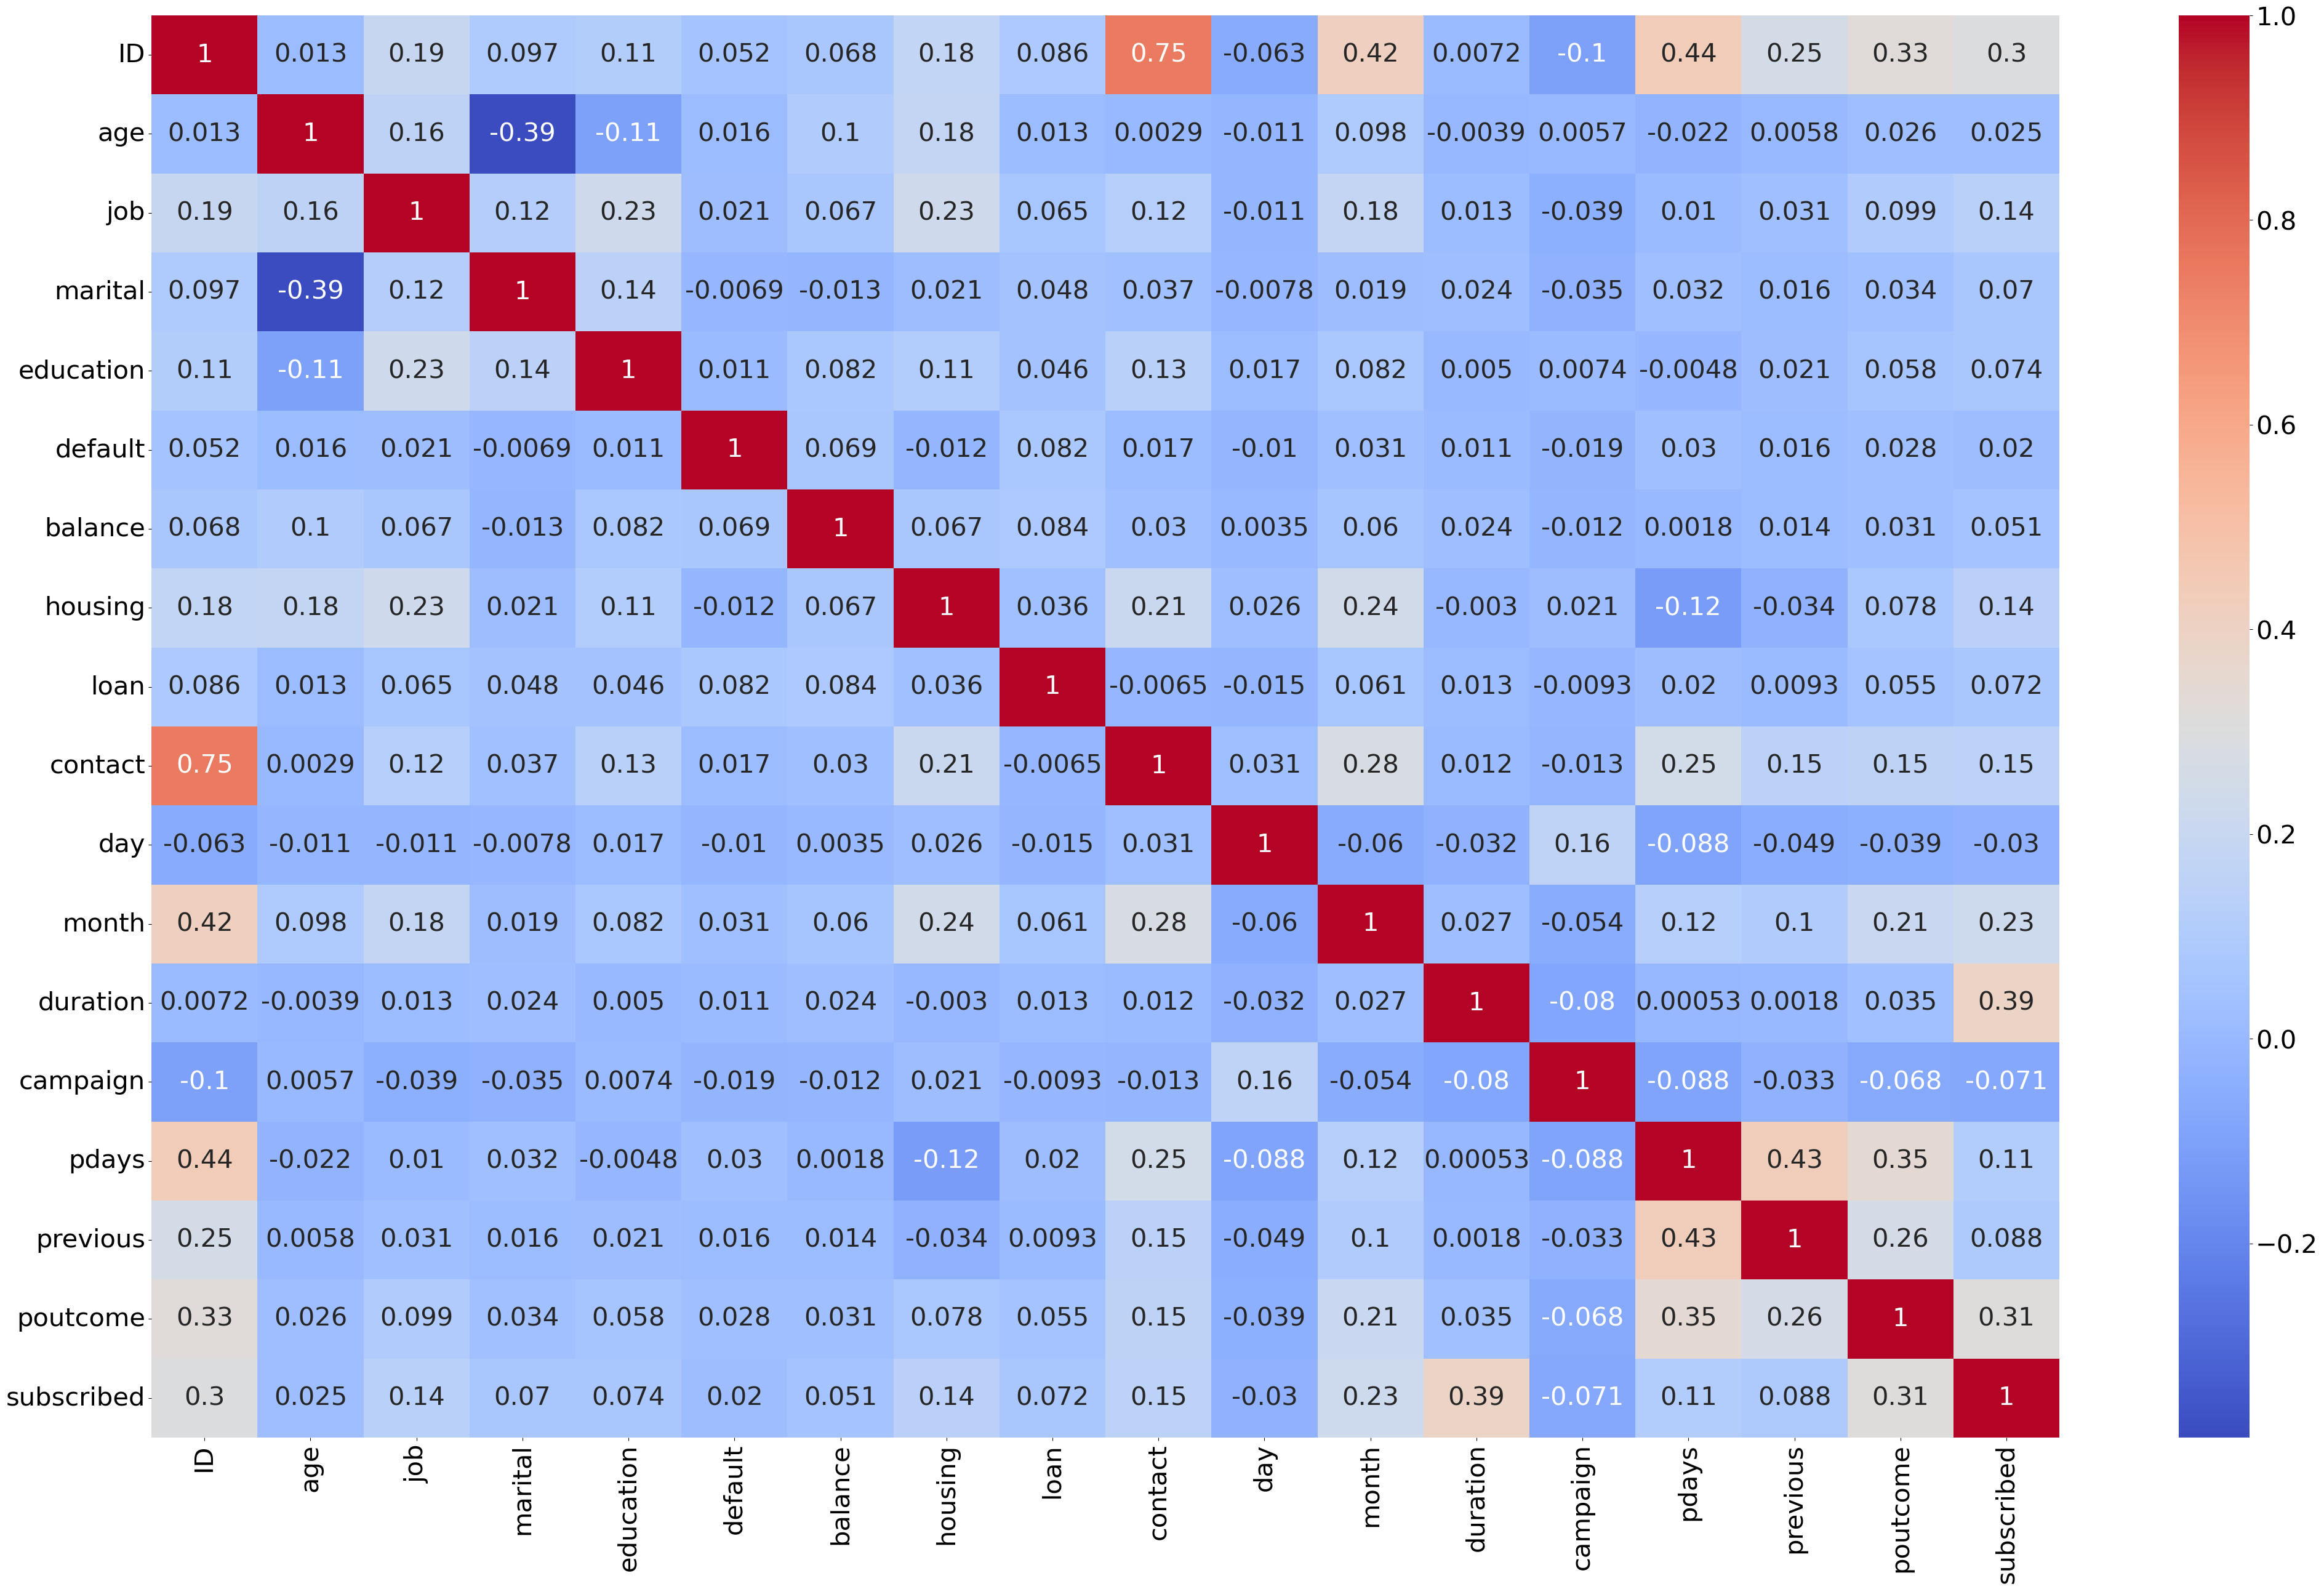

In [101]:
plt.rc("font", size=30)
plt.figure(figsize=(50 , 30))
sns.heatmap(train_df.corr(), cmap="coolwarm" , annot = True )
plt.show()

In [102]:
train_df.corr()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,1.000000,0.013337,0.193437,0.097052,0.114273,0.051521,0.067897,0.180047,0.086140,0.748645,-0.063399,0.415550,0.007183,-0.103508,0.436148,0.254476,0.325200,0.296663
age,0.013337,1.000000,0.156064,-0.389735,-0.105558,0.016117,0.103245,0.183775,0.012657,0.002910,-0.011056,0.098293,-0.003870,0.005733,-0.021947,0.005761,0.026315,0.024538
job,0.193437,0.156064,1.000000,0.116386,0.233733,0.021086,0.066810,0.230423,0.065417,0.122588,-0.010989,0.181317,0.012666,-0.038906,0.010119,0.030532,0.099234,0.136010
marital,0.097052,-0.389735,0.116386,1.000000,0.144300,-0.006857,-0.013496,0.020810,0.047631,0.037182,-0.007821,0.018742,0.023829,-0.034941,0.032479,0.015770,0.034166,0.069574
education,0.114273,-0.105558,0.233733,0.144300,1.000000,0.010702,0.081942,0.106193,0.046462,0.133476,0.017363,0.081524,0.004975,0.007366,-0.004758,0.020706,0.057606,0.074378
default,0.051521,0.016117,0.021086,-0.006857,0.010702,1.000000,0.069422,-0.011823,0.081567,0.016898,-0.009996,0.030616,0.010849,-0.018538,0.029622,0.015877,0.028481,0.020168
balance,0.067897,0.103245,0.066810,-0.013496,0.081942,0.069422,1.000000,0.067466,0.083631,0.030104,0.003461,0.060388,0.024274,-0.012032,0.001789,0.013843,0.030861,0.050807
housing,0.180047,0.183775,0.230423,0.020810,0.106193,-0.011823,0.067466,1.000000,0.036244,0.210587,0.025666,0.241451,-0.003021,0.021076,-0.118790,-0.034231,0.077993,0.141092
loan,0.086140,0.012657,0.065417,0.047631,0.046462,0.081567,0.083631,0.036244,1.000000,-0.006510,-0.014769,0.061000,0.012781,-0.009340,0.020078,0.009258,0.055138,0.072266
contact,0.748645,0.002910,0.122588,0.037182,0.133476,0.016898,0.030104,0.210587,-0.006510,1.000000,0.030686,0.276127,0.011727,-0.012950,0.248468,0.145517,0.153362,0.152424


In [103]:
# I will select all the columns here :

# Training the dataset with different models :

In [104]:
X = train_df.drop(columns = ['ID','subscribed'])
y = train_df['subscribed']

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [106]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.3 )

In [107]:
# While using the confusion matrix , I would go for False Positive ( A person actually have subscribed but model showing not subscribed)
# In whichmodel , False positive value is less , I would go for that model

# Using different models :

In [108]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

# RandomForestClaasifer :

In [110]:
# Checking the best random_state value for RandomForestClassifier :
rf_results = []

for i  in range(50):
    X_train , X_test , y_train  , y_test = train_test_split(X,y,test_size = 0.3 , random_state = i)
    rf = RandomForestClassifier(n_estimators = 100 ,max_depth = 10)
    rf.fit(X_train , y_train)
    y_pred = rf.predict(X_test)
    rf_results.append(accuracy_score(y_test , y_pred))

In [111]:
print(np.argmax(rf_results))
print(rf_results[np.argmax(rf_results)])

4
0.9091100579252238


In [112]:

steps = [
    ("scaler", StandardScaler()),
    ("pca", PCA()),
    ("logistic", RandomForestClassifier(n_estimators = 100 , max_depth = 7) )  
]

pipe = Pipeline(steps=steps)

In [114]:
X_train_r , X_test_r , y_train_r , y_test_r = train_test_split(X , y, test_size = 0.3 , random_state = 4 )

In [115]:
pipe.fit(X_train_r , y_train_r)
y_pred_rf = pipe.predict(X_test_r)
print(accuracy_score(y_test_r , y_pred_rf))

0.901843075302791


In [116]:
from sklearn.metrics import confusion_matrix , classification_report

In [119]:
print(confusion_matrix(y_test_r , y_pred_rf))

[[8246  174]
 [ 758  317]]


In [ ]:
# Here the False positive value is 680 .

# LogisticRegression :

In [111]:
lr_results = []

for i  in range(100):
    X_train , X_test , y_train  , y_test = train_test_split(X,y,test_size = 0.3 , random_state = i)
    lr = LogisticRegression()
    lr.fit(X_train , y_train)
    y_pred = lr.predict(X_test)
    lr_results.append(accuracy_score(y_test , y_pred))

In [112]:
print(np.argmax(lr_results))
print(lr_results[np.argmax(lr_results)])

59
0.905318588730911


In [113]:
X_train1 , X_test1 , y_train1  , y_test1 = train_test_split(X,y,test_size = 0.3 , random_state = 59)

In [114]:
# Checking the best parameters for LogisticRegression :
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.001,0.1,1],
}

grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(X_train1, y_train1)

y_pred_lr = grid_search.best_estimator_.predict(X_test1)

accuracy = accuracy_score(y_test1, y_pred_lr)
print("Accuracy score of Logistic Regression :", accuracy)
print('best parameters :',grid_search.best_params_)

Accuracy score of Logistic Regression : 0.905318588730911
best parameters : {'C': 1, 'penalty': 'l2'}


In [115]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

steps = [
    ("scaler", StandardScaler()),
    ("pca", PCA()),
    ("logistic", LogisticRegression(C = 1 ,penalty = 'l2') )  
]

pipe_lr = Pipeline(steps=steps)

In [116]:
pipe_lr.fit(X_train , y_train)
y_pred_lr = pipe_lr.predict(X_test)
print(accuracy_score(y_test , y_pred_lr))

0.9016324381253291


In [119]:
print(confusion_matrix(y_test , y_pred_lr))

[[8173  209]
 [ 725  388]]


In [120]:
# Here , the value of False positive is 725 , less than random forest

In [ ]:
# So , Here I will go for LogisticRegression and the random_state of train_test_split will be 59

In [ ]:
# Here , I wanted to perform other models also , But Machine is taking too much of time to execute the code . It is Hanging.
# I am sorry for that !